#  Machine Learning - Spring 2019

## Mini-Project I

### K-Means Clustering Algorithm

Created on: March 10, 2019 by Ralph Florent <r.florent@jacobs-university.de>

### Description
Write programmatically re-usable K-means clustering algorithm.

### Summary
The script below allows to compute the K-means clustering Machine Learning algorithm. This script was inspired by the pseudocode/algorithm from the **Dr. Herbert Jaeger**'s Machine Learning Lecture Notes. The algorithm is described in the following steps:
* Given: a training data set (xi)i=1,...,N ∈ Rn, and a number K of clusters that one maximally wishes to obtain.
* Initialization: randomly assign the training points to K sets Sj (j = 1, . . . , K).
* Repeat: For each set Sj, compute the mean µj = Sum(x)/|Sj| for x ∈ Sj. This mean vector µj is the “center of gravity” of the vector cluster Sj. Create new sets S'j by putting each data point xi into that set S'j where Modulus(xi − µj) is minimal. If some S'j remains empty, dismiss it and reduce K to K' by subtractring the number of dismissed empty sets (this happens rarely). Put Sj = S'j (for the nonempty sets) and K = K'.
* Termination: Stop when in one iteration the sets remain unchanged.

The algorithm was tested on the OCR datasets from the `DigitsBasicsRoutine.zip`, which was provided by Professor H. Jaeger, Machine Learning Professor at [Jacobs University Bremen](https://www.jacobs-university.de).

In [43]:
# -*- coding: utf-8 -*-
#
# Created on March 10, 2019
# Author: Ralph Florent <r.florent@jacobs-university.de>

# Import relevant libraries
import matplotlib.pyplot as plt
import numpy as np
from copy import deepcopy


### START: scripts
PATTERN_SIZE = 200

def get_data_points(digit = -1):
    filepath = './assets/mfeat-pix.txt'
    data_points = np.loadtxt(filepath)
    
    if(digit >= 0 and digit <= 9):
        START = digit * PATTERN_SIZE
        END   = START + PATTERN_SIZE
        return data_points[START:END] 
    return data_points # arr([ points[], ..., N])


def assign_randomly(data, K):
    np.random.shuffle(data)
    if K > len(data): # protect array
        K = len(data)
    return np.array( [data[i::K] for i in range(K)]) # arr([ arr(cluster[ arr(points[]),...]), ..., K])

# deprecated by: np.mean(clusters[j], axis=0)
def compute_mean_cluster(cluster):
    length = len(cluster) # cluster's size
    if length == 0: # avoid division by zero exception
        return None
    accumulator = np.zeros( len(cluster[0]) ) # array of zeros
    for vector in cluster:
        accumulator += vector # add operations arrays
    return accumulator / length  # arr(points[...])


def to_list(nested_array):
    # convert nested arrays into nested lists 
    if not isinstance(nested_array, np.ndarray):
        return nested_array
    return [ to_list(arr) for arr in nested_array]


def to_array(clusters_list):
    if not isinstance(clusters_list, list):
        return clusters_list
    return np.array([ to_array(l) for l in clusters_list ])


def get_codebooks(clusters):
    return np.array([ compute_mean_cluster(c) for c in clusters])
    

def k_mean(data, K = 1):
    
    # K random positions to assign Set of clusters Sj
    clusters = assign_randomly(data, K)
    
    # Iterate over the Sj while computing Modulus(xi − µj) 
    while True:
        clone_clusters = [[] for i in range(K)] # clone clusters: list
        
        for point in data:
            distances = [] # between data points and mean cluster
            for j in range(K):
                # compute mean of the cluster: codebook vector
                mean_cluster = np.mean(clusters[j], axis=0)
                
                # compute distance between data point and mean cluster 
                distance = np.linalg.norm(point - mean_cluster)
                distances.append(distance)
                
            # Put point into the cluster where the distance is minimal 
            which_cluster = distances.index( min(distances) )
            clone_clusters[ which_cluster ].append( list(point) )
        
        # remove cluster if it is empty
        for cluster in clone_clusters:
            if not cluster:
                clone_clusters.remove(cluster)
                K -= 1
        
        # check if sets remain unchanged 
        if clone_clusters == to_list(clusters): break
            
        # update to optimal clusters
        clusters  = to_array( deepcopy(clone_clusters) )
        
    return clusters


def plot_figure(dataset):
    n_vectors = len(dataset)
        
    fig = plt.figure(figsize=(11, 6.5))
    for i in range(n_vectors):
        graph = fig.add_subplot(10, 20, i + 1)
        graph.imshow(dataset[i].reshape(16, 15), cmap='binary')
        graph.axis('off')
    plt.show()


### Visualizations of the `x-digit` subset

The `get_data_points(digit)` function helps to obtain a specific subset of the selected digit between 0-9. In case no digits are specified, it loads the entire 2000 datapoints from the local file `./assets/mfeat-pix.txt`.

For example, to load the five-digit subset, the function `get_data_points(5)` is to be called.

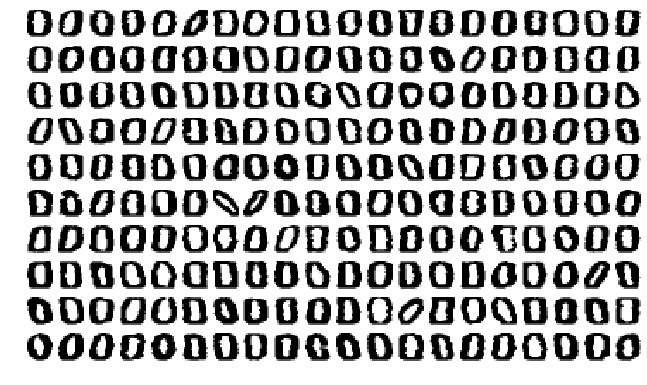

In [16]:
# Load the digit-class data points from the OCR datasets.
zeros = get_data_points(0)

# Visualize dataset for the zeros dataset
plot_figure(zeros)

### Another example of digit-class data loading

Let's load this time the 7-digit class pattern from the dataset.

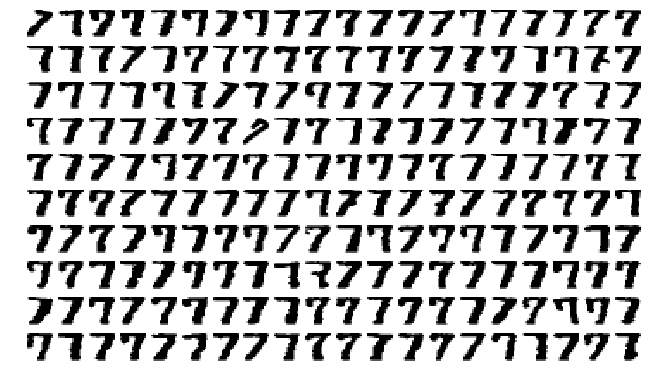

In [17]:
# Load the seven-class data points from the OCR datasets.
sevens = get_data_points(7)

# Visualize dataset for the `sevens` subset
plot_figure(sevens)

### Application of the K-means clustering algorithm

The implemented-above K-means clustering algorithm computes the K-specified clusters. If the codebook vectors are required, the `compute_mean_cluster(clusters)` should be invoked.

First, let's run the algorithm for the `sevens` where K = 1, 2, 3, 200. Then, we visualize the respective generated clusters.

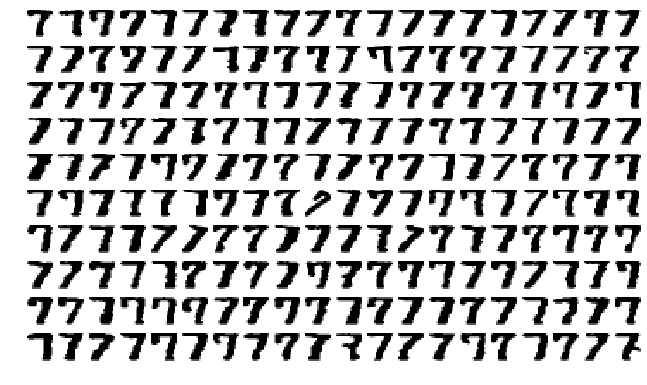

In [18]:
# Run k-means algorithm on the data set for the sevens class pattern for K = 1
sevens_clustered_1 = k_mean(sevens, 1)

# Visualize dataset for the sevens_clustered_1 dataset
for cluster in sevens_clustered_1:
    plot_figure(cluster)

Let's now visualize the codebook vector for the `sevens` where K = 1

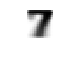

In [19]:
# Compute the codebook vectors for the sevens when K = 1
codebooks_cluster_1 = get_codebooks(sevens_clustered_1)
plot_figure(codebooks_cluster_1)

Let's run the algorithm again for the `sevens` where K = 2

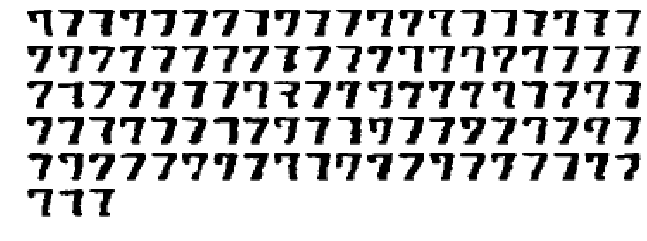

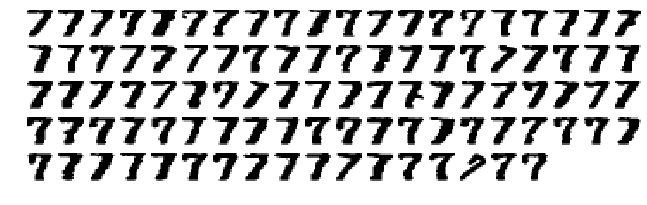

In [20]:
# Run k-means algorithm on the data set for the sevens class pattern for K = 2
sevens_clustered_2 = k_mean(sevens, 2)

# Visualize dataset for the sevens_clustered_2 dataset
for cluster in sevens_clustered_2:
    plot_figure(cluster)

Visualize the codebook vector for the sevens where K = 2

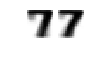

In [21]:
# Compute the codebook vectors for the sevens when K = 2
codebooks_cluster_2 = get_codebooks(sevens_clustered_2)
plot_figure(codebooks_cluster_2)

Let's run the algorithm again for the `sevens` where K = 3

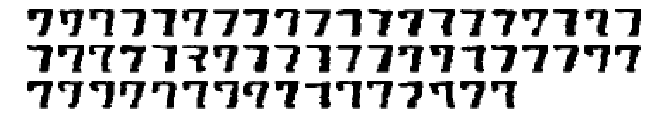

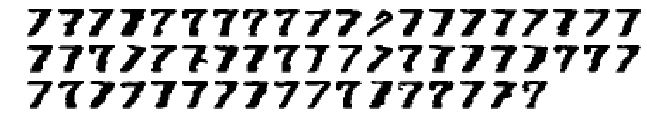

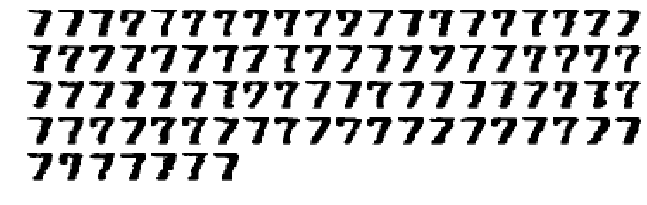

In [22]:
# Run k-means algorithm on the data set for the sevens class pattern for K = 3
sevens_clustered_3 = k_mean(sevens, 3)

# Visualize dataset for the sevens_clustered_3 dataset
for cluster in sevens_clustered_3:
    plot_figure(cluster)

Visualize the codebook vector for the `sevens` where K = 3

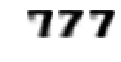

In [23]:
# Compute the codebook vectors for the sevens when K = 3
codebooks_cluster_3 = get_codebooks(sevens_clustered_3)
plot_figure(codebooks_cluster_3)

Let's finally run the algorithm again for the `sevens` where K = 200

In [72]:
# scale it because distances are zeros
fives = get_data_points(5)
scaler = preprocessing.MinMaxScaler()
fives_scaled = scaler.fit_transform(fives)

In [28]:
fives = get_data_points(5)

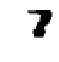

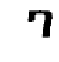

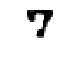

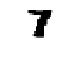

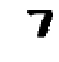

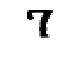

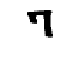

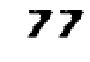

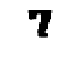

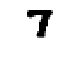

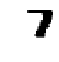

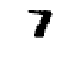

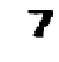

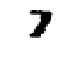

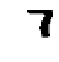

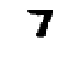

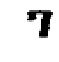

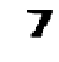

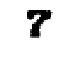

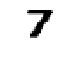

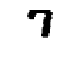

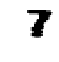

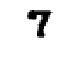

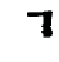

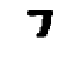

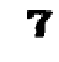

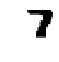

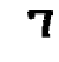

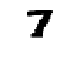

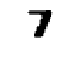

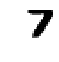

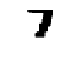

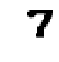

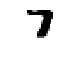

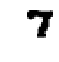

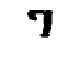

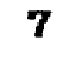

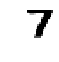

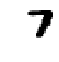

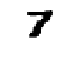

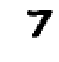

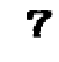

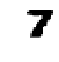

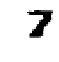

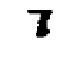

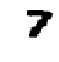

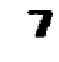

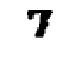

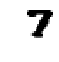

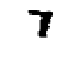

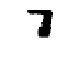

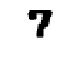

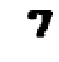

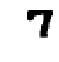

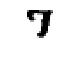

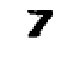

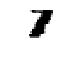

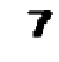

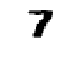

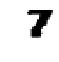

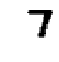

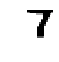

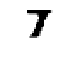

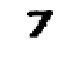

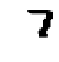

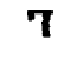

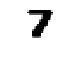

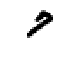

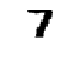

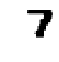

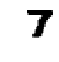

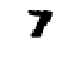

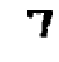

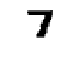

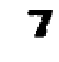

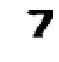

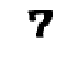

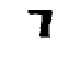

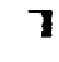

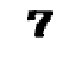

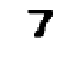

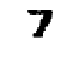

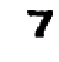

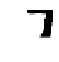

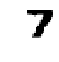

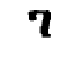

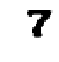

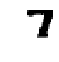

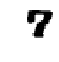

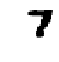

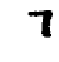

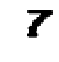

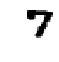

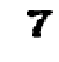

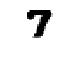

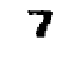

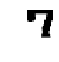

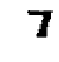

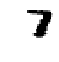

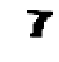

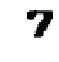

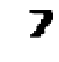

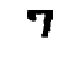

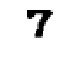

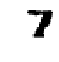

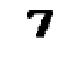

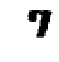

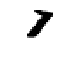

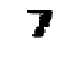

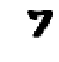

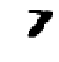

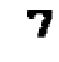

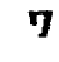

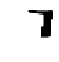

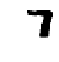

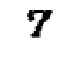

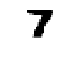

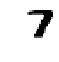

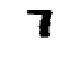

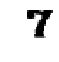

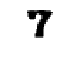

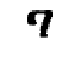

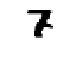

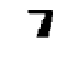

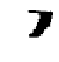

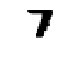

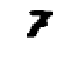

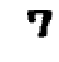

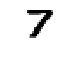

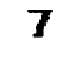

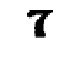

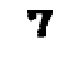

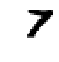

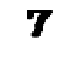

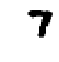

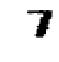

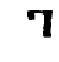

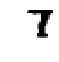

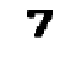

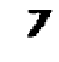

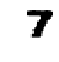

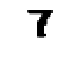

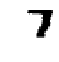

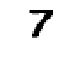

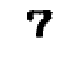

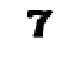

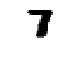

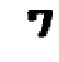

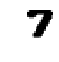

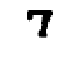

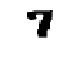

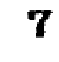

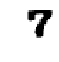

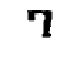

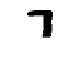

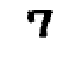

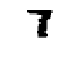

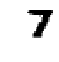

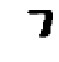

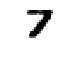

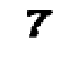

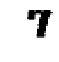

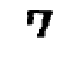

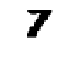

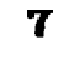

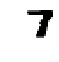

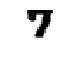

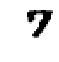

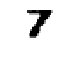

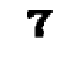

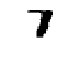

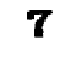

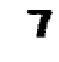

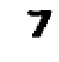

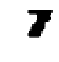

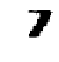

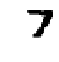

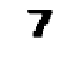

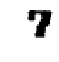

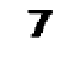

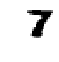

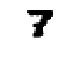

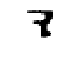

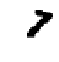

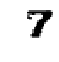

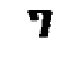

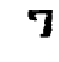

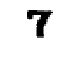

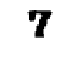

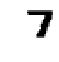

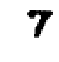

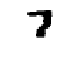

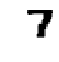

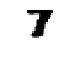

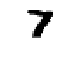

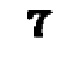

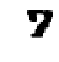

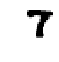

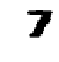

In [44]:
# Run k-means algorithm on the dataset for the sevens class pattern for K = 200
sevens_clustered_200 = k_mean(sevens, 200)

# Visualize dataset for the sevens_clustered_200 dataset
for cluster in sevens_clustered_200:
    plot_figure(cluster) # only plot non-empty clusters

Visualize the codebook vector for the `sevens` where K = 200

In [ ]:
# Compute the codebook vectors for the sevens when K = 200
codebooks_cluster_200 = get_codebooks(sevens_clustered_200)
plot_figure(codebooks_cluster_200)